In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers.pooling import GlobalAveragePooling1D
from tensorflow.keras.optimizers import SGD

In [ ]:
# Extract airline review tweet dataset
!unzip /content/archive.zip


Archive:  /content/archive.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Read CSV
url = '/content/Tweets.csv'
data = pd.read_csv(url, encoding="latin-1", on_bad_lines='skip')
# Encode labels
label_encoder = preprocessing.LabelEncoder()
data['airline_sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])
data['airline_sentiment']
num_class = len(pd.unique(data['airline_sentiment']))
print(num_class)

# Split dataset into training and test sets
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['text'],
    data['airline_sentiment'], test_size=0.2, shuffle=False)

print(train_x[0:10])
print(train_y[0:10])

3
0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8    @virginamerica Well, I didn'tâ¦but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object
0    1
1    2
2    1
3    0
4    0
5    0
6    2
7    1
8    2
9    2
Name: airline_sentiment, dtype: int64


In [ ]:
# Determine the max length of the tweets

i = 0
max_length = 0
for i in range(len(data)):
  if(len(data['text'][i]) > max_length):
    max_length = len(data['text'][i])

# max_length
# print(data['text'][x])

In [ ]:
# word to integer ID tokenizing + padding
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(data['text'])
word_index = tokenizer.word_index

train_x_seq = sequence.pad_sequences(tokenizer.texts_to_sequences(train_x), maxlen=max_length)
test_x_seq = sequence.pad_sequences(tokenizer.texts_to_sequences(test_x), maxlen=max_length)

train_y = to_categorical(train_y, num_class)
test_y = to_categorical(test_y, num_class)

# train_x_seq[3]

In [ ]:


# Create CNN
vocab_size = len(word_index)+1

model = Sequential()
model.add(layers.Embedding(vocab_size, 150))
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu')) 
# Should experiment with kernel size and no of filters


model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(32, input_shape=(vocab_size, )))
model.add(layers.Activation(activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))

model.summary()

opt = SGD()
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(train_x_seq.shape)
print(train_y.shape)

history = model.fit(
    train_x_seq,
    train_y,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1)

results = model.evaluate(test_x_seq, test_y)



print(results)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 150)         2365500   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         96128     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [ ]:
# Function for plotting accuracy and loss
def plot_model(a, b, title, ylabel, xlabel):
  plt.plot(a)
  plt.plot(b)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

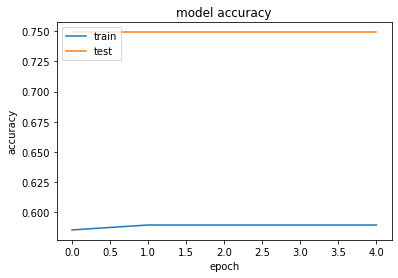

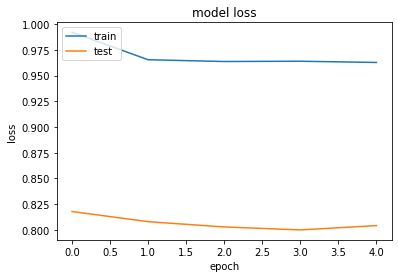

In [ ]:
plot_model(history.history['accuracy'], history.history['val_accuracy'], 
           'model accuracy', 'accuracy', 'epoch')
plot_model(history.history['loss'], history.history['val_loss'], 
           'model loss', 'loss', 'epoch')